Text(0.5, 1.0, 'Visualize Priors of A, B and C')

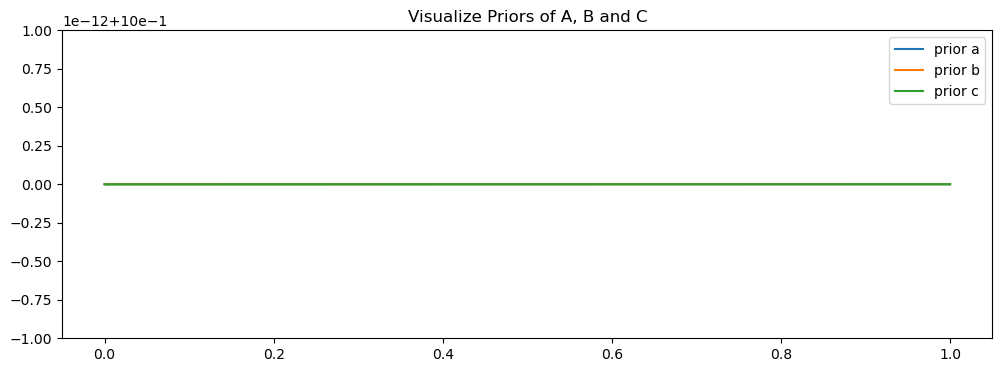

In [202]:
import numpy as np
from scipy import stats
from scipy.stats import beta
import matplotlib.pyplot as plt

# Set probability for each game. The outcome of each game will follow a bernoulli distribution with 
# varying theta values. 
p_a = 0.2
p_b = 0.5
p_c = 0.8

# Select priors for the parameter theta in a, b and c
# For each game, the prior will be a beta distribution with hyperparameters alpha=beta=1, which is equivalent to
# the [0, 1] uniform distribution in this case. 
parameter_domain = np.linspace(0,1,1001)
parameters_a = [1, 1]
parameters_b = [1, 1]
parameters_c = [1, 1]
prior_a = stats.beta(parameters_a[0], parameters_a[1]).pdf(parameter_domain)
prior_b = stats.beta(parameters_b[0], parameters_b[1]).pdf(parameter_domain)
prior_c = stats.beta(parameters_c[0], parameters_c[1]).pdf(parameter_domain)

# Plot out assumed priors
plt.figure(figsize=(12,4))
plt.plot(parameter_domain, prior_a, label="prior a")
plt.plot(parameter_domain, prior_b, label="prior b")
plt.plot(parameter_domain, prior_c, label="prior c")
plt.legend()
plt.title("Visualize Priors of A, B and C")

In [203]:
# This function plays either game a, b or c according to input, and returns the outcome, 1 for success and 0 for 
# failure. 
# Precondition: input should be one of the following: "a", "b", "c". 

def play(game: str): 
    if game == "a": 
        return stats.binom(n=1,p=p_a).rvs(size=1)
    elif game == "b": 
        return stats.binom(n=1,p=p_b).rvs(size=1)
    else: 
        return stats.binom(n=1,p=p_c).rvs(size=1)

In [204]:
# In this case, we have a bernoulli distribution as our likelihood, and a beta distribution as our prior. Based on
# the properties of these two distributions, upon multiplying the prior with the likelihood, we get a
# posterior which is a beta distribution with posterior_alpha=prior_alpha+1, posterior_beta=prior_beta 
# if data=1 and posterior_alpha=prior_alpha and posterior_beta=prior_beta+1 if data=0. 

# Thus, the beta distribution is a conjugate prior in this case. For each round of updating, the prior is a beta
# distribution, and the posterior, which will be the prior in the next round, is also a beta distribution. 


# This function takes a game outcome (data) and a prior distribution (alpha and beta parameters of the 
# beta distribution), and computes a posterior distribution, which is just another beta distribution with updated
# parameters. It replaces the original prior with the posterior distribution to be used in the next round. 
# (Posterior becomes the new prior in the next round)

def update_priors(result: int, parameters: list[int]): 
    if result == 1:
        parameters[0] += 1
    else: 
        parameters[1] += 1

# This function samples from the current priors of a, b and c, and returns the largest value. It will choose the
# game with the largest sample value as the game to play next. 

def choose_best(parameters_a: list[int], parameters_b: list[int], parameters_c: list[int]) -> str: 
    prob_a = stats.beta(a=parameters_a[0],b=parameters_a[1]).rvs(size=1)
    prob_b = stats.beta(a=parameters_b[0],b=parameters_b[1]).rvs(size=1)
    prob_c = stats.beta(a=parameters_c[0],b=parameters_c[1]).rvs(size=1)
    if max(prob_a, prob_b, prob_c) == prob_a: 
        return "a"
    elif max(prob_a, prob_b, prob_c) == prob_b:
        return "b"
    else: 
        return "c"

# Strategy for game: 
# For each round, we sample from each of the priors for a, b and c. The (parameters of) prior distributions
# will reflect our beliefs concerning the likelihoods of winning for each game. We will select the game with
# the largest sample value and play this game in the next round. Each game (at least after a while) will not have
# equal chance of being chosen, but will still have some chance of being chosen, optimizing our chances of 
# winning while still leaving space for exploration. 

# (The function also outputs the game it chooses for each round, just to show part of the selection process)

def strategy(rounds: int): 
    i=0
    while i < rounds: 
        if choose_best(parameters_a, parameters_b, parameters_c) == "a": 
            update_priors(play("a"), parameters_a)
            print("a")
        elif choose_best(parameters_a, parameters_b, parameters_c) == "b": 
            update_priors(play("b"), parameters_b)
            print("b")
        else: 
            update_priors(play("c"), parameters_c)
            print("c")
        i += 1


a
c
c
b
c
c
b
c
b
c
c
c
c
c
c
c
c
c
b
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
b
c
b
c
b
c
c
c
c
c
b
0.3333333333333333 0.7 0.8604651162790697


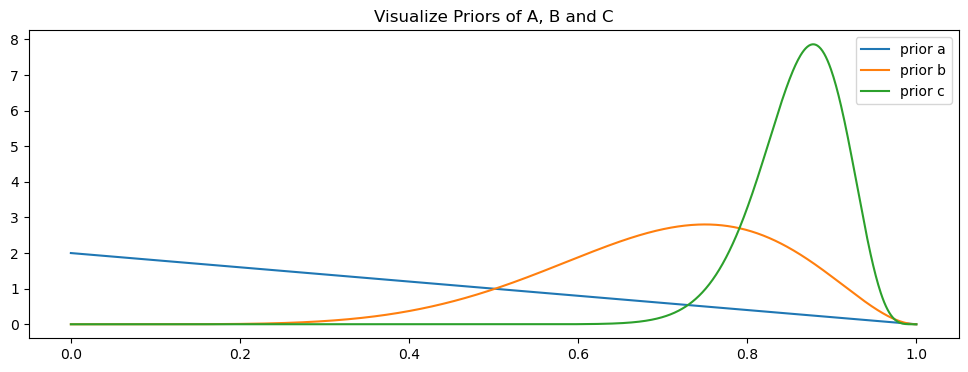

In [205]:
# set seed
np.random.seed(70)

# Play the game with our strategy 50 times. We can see that as the game progresses, the algorithm quickly develops
# a preference for the game with largest probability of winning (c). However, as game selection is fundamentally 
# a random process, other games can still get chosen. 
strategy(50)

# Plot the current priors(posteriors) of a, b and c
prior_a = stats.beta(parameters_a[0], parameters_a[1]).pdf(parameter_domain)
prior_b = stats.beta(parameters_b[0], parameters_b[1]).pdf(parameter_domain)
prior_c = stats.beta(parameters_c[0], parameters_c[1]).pdf(parameter_domain)
plt.figure(figsize=(12,4))
plt.plot(parameter_domain, prior_a, label="prior a")
plt.plot(parameter_domain, prior_b, label="prior b")
plt.plot(parameter_domain, prior_c, label="prior c")
plt.legend()
plt.title("Visualize Priors of A, B and C")

# Finally, we can produce an estimate of theta values with now updated posterior distributions. The expected value
# (mean) of the beta distribution can be computed as: alpha/(alpha + beta)
# Due to various reasons, this is probably not a very accurate estimation, but roughly shows the relative chances
# of winning (e.g. which game is most likely to win, which is least likely)
mean_a = parameters_a[0] / (parameters_a[0] + parameters_a[1])
mean_b = parameters_b[0] / (parameters_b[0] + parameters_b[1])
mean_c = parameters_c[0] / (parameters_c[0] + parameters_c[1])
print(mean_a, mean_b, mean_c)
